# Conjunto de dados para classificação da qualidade de vinho

## Definição do Problema

O conjunto de dados da qualidade de vinho <https://archive.ics.uci.edu/ml/datasets/wine+quality> consiste na predição da qualidade de vinhos brancos sobre uma escala dada medições químicas de cada vinho.

Trata-se de um problema de classificação multi-classe, mas pode ser também formulado como um problema de regressão. O número de observações para cada classe não é balanceado. Existem 4,898 observações com 11 variáveis de entrada e uma variável de saída. Os nomes das variáveis são as seguintes:

1. Acidez fixa.
2. Acidez volátil.
3. Ácido cítrico.
4. Resíduos de açúcar.
5. Cloretos.
6. Dióxido de enxofre livre.
7. Dióxido de enxofre total.
8. Densidade.
9. pH.
10. Sulfatos.
11. Álcool.
12. Qualidade (nota entre 0 e 10).

Atributo de predição: Classe da qualidade de vinho

### Importação das bibliotecas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
import seaborn as sns
from sklearn import model_selection
from sklearn.preprocessing import Normalizer,StandardScaler

### Carregando e definindo as colunas do dataset

In [137]:
data = pd.read_csv('winequality-white.csv',header=0, sep=';')
#data= data[(data.T != 0).all()]

### Visualização e descrição dos dados

In [138]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [114]:
data.describe()

,fixed acidity,alcohol,quality
count,4898.000000,4898.000000,4898.000000
mean,6.854788,10.514267,5.877909
std,0.843868,1.230621,0.885639
min,3.800000,8.000000,3.000000
25%,6.300000,9.500000,5.000000
50%,6.800000,10.400000,6.000000
75%,7.300000,11.400000,6.000000
max,14.200000,14.200000,9.000000


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 3 columns):
fixed acidity    4898 non-null float64
alcohol          4898 non-null float64
quality          4898 non-null int64
dtypes: float64(2), int64(1)
memory usage: 114.9 KB


In [116]:
print(data.shape)

(4898, 3)


In [117]:
print(data.groupby('quality').size())

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


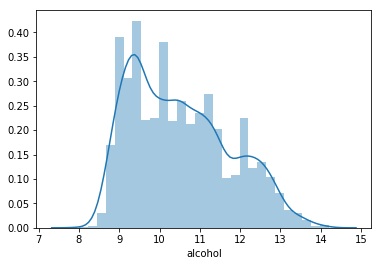

In [118]:
sns.distplot(data.alcohol);

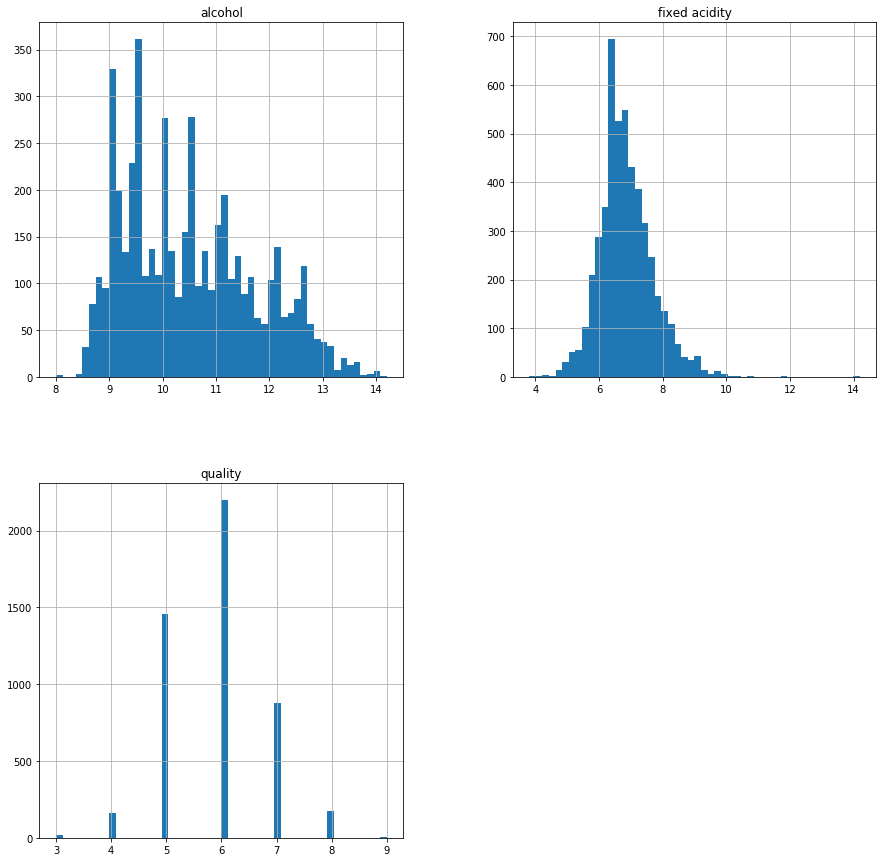

In [119]:
data.hist(figsize=(15,15), bins=50);

In [120]:
corr = data.corr()
corr

,fixed acidity,alcohol,quality
fixed acidity,1.000000,-0.120881,-0.113663
alcohol,-0.120881,1.000000,0.435575
quality,-0.113663,0.435575,1.000000


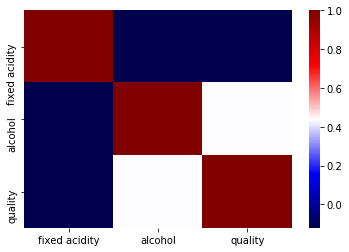

In [121]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='seismic')

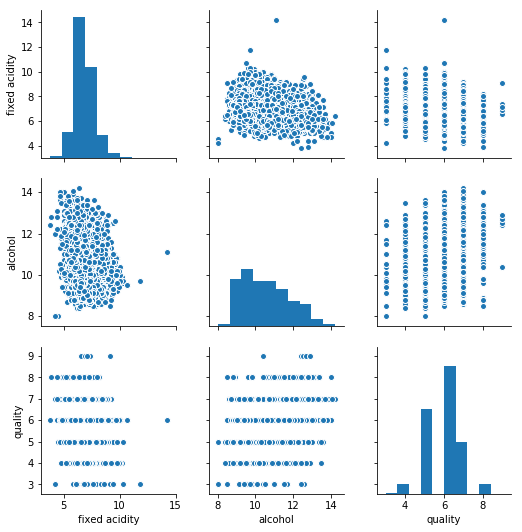

In [122]:
sns.pairplot(data)

In [123]:
data.corr()

,fixed acidity,alcohol,quality
fixed acidity,1.000000,-0.120881,-0.113663
alcohol,-0.120881,1.000000,0.435575
quality,-0.113663,0.435575,1.000000


### Criação do dataset de validação 

In [124]:
dataset = data.values
print(dataset)

[[ 7.   8.8  6. ]
 [ 6.3  9.5  6. ]
 [ 8.1 10.1  6. ]
 ...
 [ 6.5  9.4  6. ]
 [ 5.5 12.8  7. ]
 [ 6.  11.8  6. ]]


In [125]:
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[ 6.2,  9.2,  4. ],
       [ 6.4,  9.2,  6. ],
       [ 6.4, 11.1,  7. ],
       ...,
       [ 8.4, 11.1,  4. ],
       [ 6.1, 10.7,  5. ],
       [ 7.2,  9. ,  6. ]])

In [126]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [127]:
split = model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=1)
idxs =  split.split(X,y)
for idx_train,idx_test in idxs:
    pass
#print (idx_train, idx_test)

In [128]:
X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]
y_test = y[idx_test]

In [129]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4898, 2), (4898,), (3673, 2), (3673,), (1225, 2), (1225,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [130]:

resultados = {}
resultados['DTC'] = { 'model': tree.DecisionTreeClassifier() }
resultados['SVC'] = { 'model': svm.SVC() }
resultados['KNN'] = { 'model': neighbors.KNeighborsClassifier() }
resultados['LOR'] = { 'model': linear_model.LogisticRegression() }
resultados['NB'] = { 'model':  naive_bayes.GaussianNB() }
resultados['SGD'] = { 'model': linear_model.SGDClassifier(max_iter=1000) }
resultados['RF'] = { 'model': ensemble.RandomForestClassifier() }
resultados['GB'] = { 'model': ensemble.GradientBoostingClassifier() }

In [131]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['accuracy'] = metrics.accuracy_score(y_test, resultados[key]['y_pred'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [132]:
df = pd.DataFrame(resultados)
df.T[['accuracy','y_pred']]

,accuracy,y_pred
DTC,0.502041,"[6.0, 5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, ..."
GB,0.477551,"[6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."
KNN,0.476735,"[6.0, 5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."
LOR,0.470204,"[6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."
NB,0.467755,"[7.0, 6.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."
RF,0.523265,"[7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ..."
SGD,0.410612,"[6.0, 5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 5.0, 6.0, ..."
SVC,0.481633,"[6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, ..."


In [133]:
df_T = df.transpose()
df_T = df_T[ ['accuracy'] ]
df_T

,accuracy
DTC,0.502041
GB,0.477551
KNN,0.476735
LOR,0.470204
NB,0.467755
RF,0.523265
SGD,0.410612
SVC,0.481633


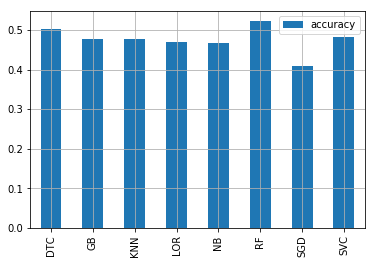

In [134]:
df_T.plot(kind='bar', grid=True);

In [135]:
norm = Normalizer()
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)
X_test_std = std.transform(X_test)
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train_norm, y_train)
    resultados[key]['y_pred_norm'] = resultados[key]['model'].predict(X_test_norm)
    resultados[key]['accuracy_norm'] = metrics.accuracy_score(y_test, resultados[key]['y_pred_norm'])
    resultados[key]['model'].fit(X_train_std, y_train)
    resultados[key]['y_pred_std'] = resultados[key]['model'].predict(X_test_std)
    resultados[key]['accuracy_std'] = metrics.accuracy_score(y_test, resultados[key]['y_pred_std'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [136]:
df = pd.DataFrame(resultados)
df_T = df.transpose()
df_T = df_T[ ['accuracy_norm', 'accuracy_std'] ]
df_T

,accuracy_norm,accuracy_std
DTC,0.496327,0.502857
GB,0.497143,0.476735
KNN,0.462041,0.481633
LOR,0.453061,0.475102
NB,0.442449,0.467755
RF,0.489796,0.508571
SGD,0.448163,0.457959
SVC,0.457143,0.478367
